In [1]:
from K2sensclass import *
from truncate_cmap import truncate_colormap
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# get K2sensitivity objects moved over from ricky
fs = np.array(glob.glob('PipelineResults/EPIC_2*/E*sens*'))
print fs.size

1754


## plot maps as an example

213 203667183 100


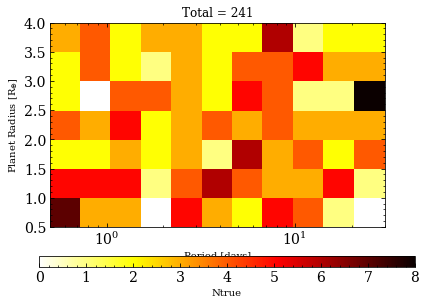

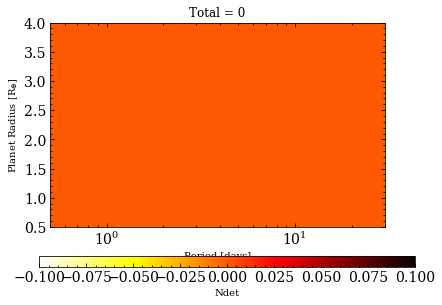

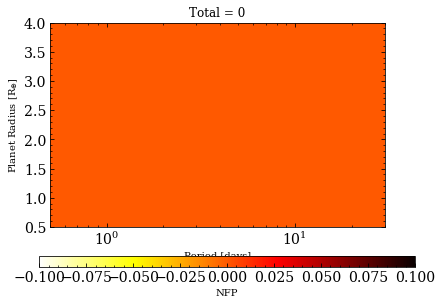

K2sensclass.py:177: RuntimeWarning: invalid value encountered in less
  g = np.where(zmap<.15)


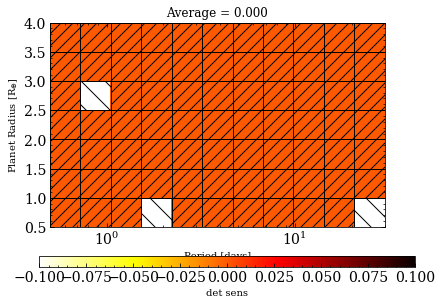

K2sensclass.py:166: RuntimeWarning: Mean of empty slice
  ax.set_title('Average = %.3f'%np.nanmean(zmap), fontsize=12)


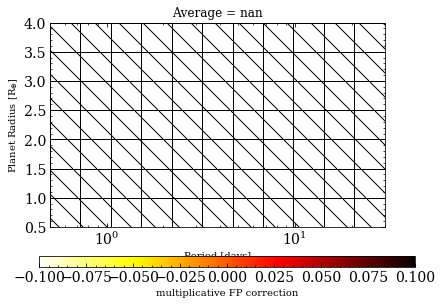

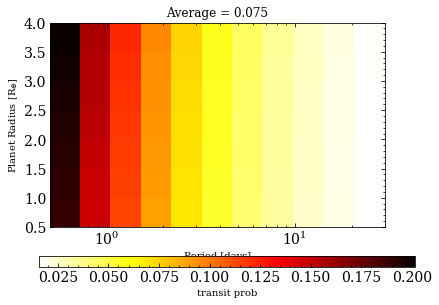

In [4]:
i = np.random.randint(fs.size)
self = loadpickle(fs[i])
print i, self.epicnum, self.Nsim
self.plot_map(self.Ntrue, 'Ntrue', sumtitle=True)
self.plot_map(self.Ndet, 'Ndet', sumtitle=True)
self.plot_map(self.NFP, 'NFP', sumtitle=True)
self.plot_map(self.sens, 'det sens', avgtitle=True, issens=True)
self.plot_map(self.yield_corr, 'multiplicative FP correction', avgtitle=True)
self.plot_map(self.transit_prob, 'transit prob', avgtitle=True)

## compute total maps (i.e. combine results from all stars)

In [5]:
'''Ndet, Ntrue, NFP = np.zeros_like(self.Ndet), np.zeros_like(self.Ndet), np.zeros_like(self.Ndet)
sens, yield_corr, transit_prob = np.zeros_like(self.Ndet), np.zeros_like(self.Ndet), np.zeros_like(self.Ndet)
for i in range(fs.size):
    self = loadpickle(fs[i])
    Ndet += self.Ndet
    Ntrue += self.Ntrue
    NFP += self.NFP
    sens_tmp, yield_corr_tmp,  = self.sens+0, self.yield_corr+0
    sens_tmp[np.isnan(sens_tmp)] = 0.
    yield_corr_tmp[np.isnan(yield_corr_tmp)] = 1.
    sens += sens_tmp / fs.size
    yield_corr += yield_corr_tmp / fs.size
    transit_prob += self.transit_prob / fs.size'''

'Ndet, Ntrue, NFP = np.zeros_like(self.Ndet), np.zeros_like(self.Ndet), np.zeros_like(self.Ndet)\nsens, yield_corr, transit_prob = np.zeros_like(self.Ndet), np.zeros_like(self.Ndet), np.zeros_like(self.Ndet)\nfor i in range(fs.size):\n    self = loadpickle(fs[i])\n    Ndet += self.Ndet\n    Ntrue += self.Ntrue\n    NFP += self.NFP\n    sens_tmp, yield_corr_tmp,  = self.sens+0, self.yield_corr+0\n    sens_tmp[np.isnan(sens_tmp)] = 0.\n    yield_corr_tmp[np.isnan(yield_corr_tmp)] = 1.\n    sens += sens_tmp / fs.size\n    yield_corr += yield_corr_tmp / fs.size\n    transit_prob += self.transit_prob / fs.size'

In [6]:
# get all planets from all simulations
Ps_tot, rps_tot, isdet_tot = np.zeros(0), np.zeros(0), np.zeros(0)
Psfound_tot, rpsfound_tot, isFP_tot = np.zeros(0), np.zeros(0), np.zeros(0)
for i in range(fs.size):
    self = loadpickle(fs[i])
    g = np.isfinite(self.Ps)
    Ps_tot = np.append(Ps_tot, self.Ps[g])
    rps_tot = np.append(rps_tot, self.rps[g])
    isdet_tot = np.append(isdet_tot, self.isdet[g])
    
    g = np.isfinite(self.Psfound)
    Psfound_tot = np.append(Psfound_tot, self.Psfound[g])
    rpsfound_tot = np.append(rpsfound_tot, self.rpsfound[g])
    isFP_tot = np.append(isFP_tot, self.isFP[g])

In [9]:
# compute sensitivity and other quantities on custom grids
xlen, ylen = 100, 50
Pgridv2, rpgridv2 = np.logspace(np.log10(.5),np.log10(30),xlen+1), np.linspace(.5,4,ylen+1)
Ndet, Ntrue, NFP = np.zeros((xlen,ylen)), np.zeros((xlen,ylen)), np.zeros((xlen,ylen))
for i in range(xlen):
    for j in range(ylen):
        g = (Ps_tot >= Pgridv2[i]) & (Ps_tot <= Pgridv2[i+1]) & (rps_tot >= rpgridv2[j]) & (rps_tot <= rpgridv2[j+1])
        Ndet[i,j] = isdet_tot[g].sum()
        Ntrue[i,j] = isdet_tot[g].size
        
        g = (Psfound_tot >= Pgridv2[i]) & (Psfound_tot <= Pgridv2[i+1]) & (rpsfound_tot >= rpgridv2[j]) & (rpsfound_tot <= rpgridv2[j+1])
        NFP[i,j] = isFP_tot[g].sum()
        
sens = Ndet / Ntrue
yield_corr = 1. - NFP / (Ndet + NFP)
np.save('PipelineResults/EPIC_K2sens_tot', sens)
np.save('PipelineResults/EPIC_K2yieldcorr_tot', yield_corr)

/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


1754


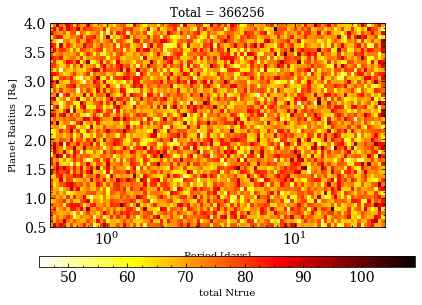

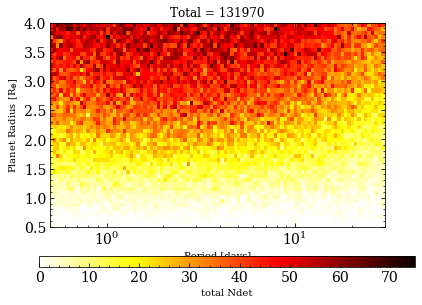

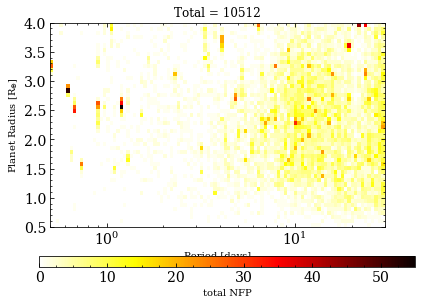

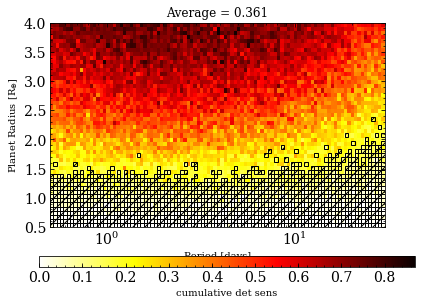

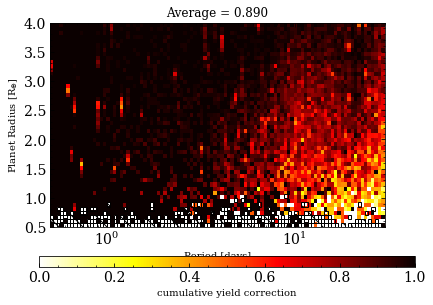

In [10]:
# plot total maps
print fs.size
self.plot_map(Ntrue, 'total Ntrue', Pgridv2, rpgridv2, sumtitle=True)
self.plot_map(Ndet, 'total Ndet', Pgridv2, rpgridv2, sumtitle=True)
self.plot_map(NFP, 'total NFP', Pgridv2, rpgridv2, sumtitle=True)
self.plot_map(sens, 'cumulative det sens', Pgridv2, rpgridv2, avgtitle=True, issens=True)
self.plot_map(yield_corr, 'cumulative yield correction', Pgridv2, rpgridv2, avgtitle=True)
#self.plot_map(transit_prob, 'avg transit prob', Pgridv2, rpgridv2, avgtitle=True)

In [8]:
def plot_correlations(Kepmags, Rss, Teffs, avgsens, avgyieldcorrs, avgtransitprobs):
    fig = plt.figure(figsize=(16,14))
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    ax7 = fig.add_subplot(337)
    ax8 = fig.add_subplot(338)
    ax9 = fig.add_subplot(339)
    
    vmin, vmax = 0, 4e2
    
    g = np.isfinite(Kepmags) & np.isfinite(avgsens)
    Z, x, y = np.histogram2d(Kepmags[g], avgsens[g], bins=(10,10))
    ax1.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    ax1.set_ylabel('Average sensitivity')
    
    g = np.isfinite(Rss) & np.isfinite(avgsens)
    Z, x, y = np.histogram2d(Rss[g], avgsens[g], bins=(10,10))
    ax2.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)

    g = np.isfinite(Teffs) & np.isfinite(avgsens)
    Z, x, y = np.histogram2d(Teffs[g], avgsens[g], bins=(10,10))
    ax3.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    
    g = np.isfinite(Kepmags) & np.isfinite(avgyieldcorrs)
    Z, x, y = np.histogram2d(Kepmags[g], avgyieldcorrs[g], bins=(10,10))
    ax4.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    ax4.set_ylabel('Avg yield correction')
    
    g = np.isfinite(Rss) & np.isfinite(avgyieldcorrs)
    Z, x, y = np.histogram2d(Rss[g], avgyieldcorrs[g], bins=(10,10))
    ax5.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)

    g = np.isfinite(Teffs) & np.isfinite(avgyieldcorrs)
    Z, x, y = np.histogram2d(Teffs[g], avgyieldcorrs[g], bins=(10,10))
    ax6.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    
    g = np.isfinite(Kepmags) & np.isfinite(avgtransitprobs)
    Z, x, y = np.histogram2d(Kepmags[g], avgtransitprobs[g], bins=(10,10))
    ax7.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    ax7.set_xlabel('Kepmag'), ax7.set_ylabel('Average transit prob')
    
    g = np.isfinite(Rss) & np.isfinite(avgtransitprobs)
    Z, x, y = np.histogram2d(Rss[g], avgtransitprobs[g], bins=(10,10))
    ax8.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    ax8.set_xlabel('Stellar radius')

    g = np.isfinite(Teffs) & np.isfinite(avgtransitprobs)
    Z, x, y = np.histogram2d(Teffs[g], avgtransitprobs[g], bins=(10,10))
    cax = ax9.pcolormesh(x, y, Z.T, cmap=truncate_colormap(plt.get_cmap('hot_r'),.01,1), vmin=vmin, vmax=vmax)
    ax9.set_xlabel('Teff')
    
    cbar_axes = fig.add_axes([.1,.1,.87,.03])
    cbar = fig.colorbar(cax, cax=cbar_axes, orientation='horizontal')
    cbar.set_label('Number of stars')
    fig.subplots_adjust(bottom=.17)

In [9]:
Kepmags, Rss, Teffs = np.zeros(fs.size), np.zeros(fs.size), np.zeros(fs.size)
avgsens, avgyieldcorrs, avgtransitprobs = np.zeros(fs.size), np.zeros(fs.size), np.zeros(fs.size)
for i in range(fs.size):
    self = loadpickle(fs[i])
    Kepmags[i], Rss[i], Teffs[i] = self.Kepmag, self.Rs, self.Teff
    avgsens[i] = np.nanmean(self.sens)
    avgyieldcorrs[i] = np.nanmean(self.yield_corr)
    avgtransitprobs[i] = np.mean(self.transit_prob)

/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice


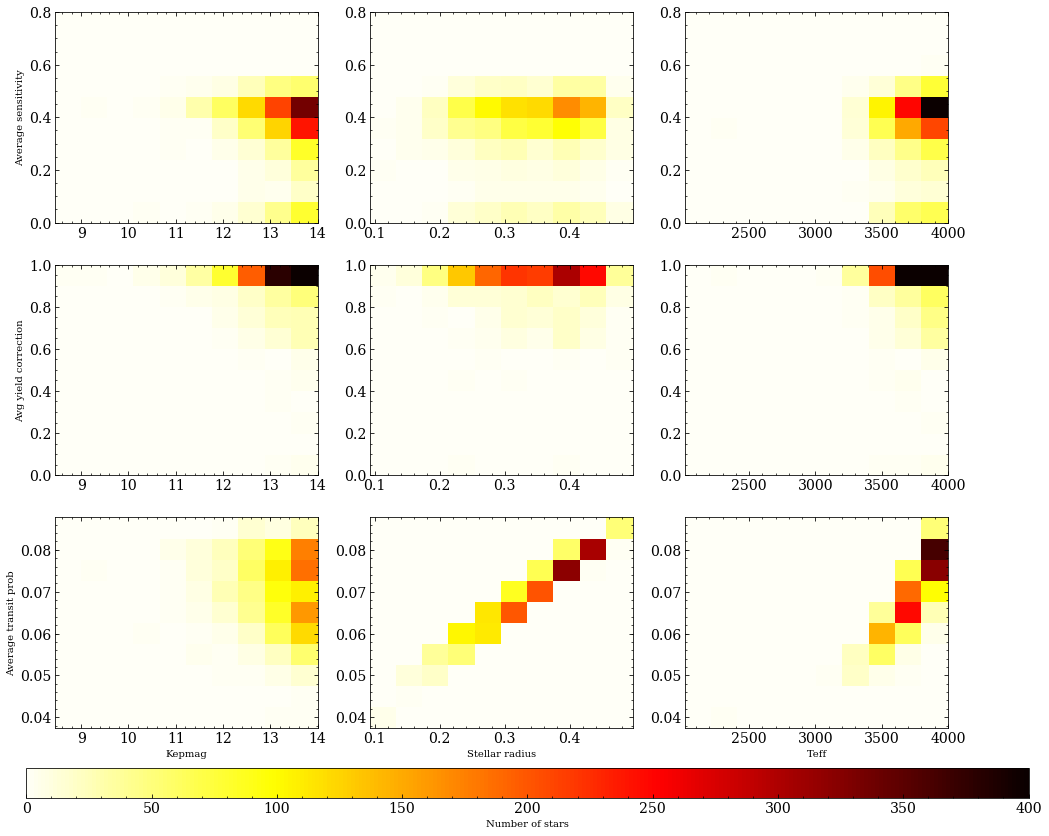

In [10]:
plot_correlations(Kepmags, Rss, Teffs, avgsens, avgyieldcorrs, avgtransitprobs)